## Décarbonation d'un parc de production d'énergie électrique : Devoir Maison
**Audrey Bovet**
Novembre 2025

Dans un premier temps on importe les bibliothèques nécessaires suggérées dans le template.
On installe aussi correctement le format des données de dates à l'aide de commande Bash.

In [1]:
# modules utiles à importer
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import locale #pour paramètre locaux de date

!sudo apt-get update -y
!sudo apt-get install -y locales
!sudo locale-gen fr_FR.UTF-8
!sudo update-locale LANG=fr_FR.UTF-8

!locale -a

locale.setlocale(locale.LC_ALL, 'fr_FR.utf8')


Hit:1 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:2 https://apt.postgresql.org/pub/repos/apt noble-pgdg InRelease            
Hit:3 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu noble InRelease     
Ign:4 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble InRelease    
Hit:5 http://archive.ubuntu.com/ubuntu noble InRelease
Err:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble Release
  404  Not Found [IP: 185.125.190.80 443]
Hit:7 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists... Done
E: The repository 'https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble Release' does not have a Release file.
N: Updating from such a repository can't be done securely, and is therefore disabled by default.
N: See apt-secure(8) manpage for repository creation and user configuration details.
W: https://apt.postgresql.org/pub/repos/apt/dists/noble-pgdg/InRel

'fr_FR.utf8'

On vérifie que tout se déroule correctement à l'aide d'un exemple car il y a eu des problèmes au début de format.

In [2]:
from datetime import datetime
print(datetime.now().strftime("%A %d %B %Y"))
print(locale.format_string("%.2f", 12345.6789, grouping=True))

mardi 11 novembre 2025
12 345,68


## Exercice 1 Analyse de la consommation
Importer la série temporelle des consommations au pas horaire de l’année 2024 (fichier Donnees_France_2024.csv)

In [3]:

df = pd.read_csv("Donnees_France_2024_fr_cet.csv", sep=';') # on ajoute le séparateur comme indiqué dans le template
print(df.head())

                       Index   Load  Biomass  Fossil Gas  Fossil Hard coal  \
0  2024-01-01 00:00:00+01:00  52847      343        1810              15.0   
1  2024-01-01 01:00:00+01:00  51600      343        1840              16.0   
2  2024-01-01 02:00:00+01:00  50992      343        1787              16.0   
3  2024-01-01 03:00:00+01:00  48187      343        1778              15.0   
4  2024-01-01 04:00:00+01:00  46479      343        1765              15.0   

   Fossil Oil  Hydro Pumped Storage Generation  \
0         162                              NaN   
1         191                              NaN   
2         190                              NaN   
3         190                              NaN   
4         191                              NaN   

   Hydro Pumped Storage Consumption  Hydro Run-of-river and poundage  \
0                            2033.0                             4822   
1                            2067.0                             4767   
2             

**Question 1**
Combien y-a-t-il de valeurs ? Comparer au nombre d'heures dans l'année.

In [4]:
#Question 1 : On cherche le nombre de valeurs, on va regarder le nombre de colonnes et le nombre de ligne
print(df.shape)
print(24*365)

(8784, 15)
8760


Il y a 8784 lignes pour 15 colonnes. 
Il y a donc 8784 valeurs pour chaque catégorie. 
On note qu'il y a des valeurs manquantes Nan. On peut les compter dans un second temps.

Il y a 24x365h dans une année soit : 8760. On remarque donc que c'est une année +1 jour.
Ce qui est cohérent car l'année 2024 est une année bissextile !
Il y a donc 366 jours soit 8784 heures. On retrouve le nombre de valeurs.

**Question 2** Identifier les valeurs et les dates d'occurence des consommations maximales et minimales. Commentez ces dates.

In [5]:
#Question 2
import pandas as pd
import locale

# Convertir la colonne Index en datetime
df['Index'] = pd.to_datetime(df['Index'], utc=True)

# Définir la locale française pour les mois en français
locale.setlocale(locale.LC_TIME, 'fr_FR.utf8')  # ou 'fr_FR' selon ton système

# Colonnes à analyser (tout sauf 'Index')
cols = df.columns.drop('Index')


summary = []

for col in cols:
    max_val = df[col].max()
    min_val = df[col].min()
    
    max_date = df.loc[df[col].idxmax(), 'Index'].strftime("%-d %B %Y")
    min_date = df.loc[df[col].idxmin(), 'Index'].strftime("%-d %B %Y")
    
    summary.append({
        'Colonne': col,
        'Valeur Max': max_val,
        'Date Max': max_date,
        'Valeur Min': min_val,
        'Date Min': min_date
    })

summary_df = pd.DataFrame(summary)

summary_df

,Colonne,Valeur Max,Date Max,Valeur Min,Date Min
0,Load,82800.0,10 janvier 2024,29575.0,12 mai 2024
1,Biomass,392.0,9 novembre 2024,301.0,11 octobre 2024
2,Fossil Gas,8953.0,28 février 2024,310.0,19 juin 2024
3,Fossil Hard coal,1087.0,12 janvier 2024,0.0,11 janvier 2024
4,Fossil Oil,1375.0,26 mars 2024,9.0,18 novembre 2024
5,Hydro Pumped Storage Generation,4876.0,27 février 2024,0.0,19 août 2024
6,Hydro Pumped Storage Consumption,3594.0,9 février 2024,0.0,27 décembre 2024
7,Hydro Run-of-river and poundage,8051.0,6 mai 2024,2197.0,21 septembre 2024
8,Hydro Water Reservoir,5212.0,10 janvier 2024,108.0,12 novembre 2024
9,Nuclear,53046.0,26 décembre 2024,20543.0,7 avril 2024


On se rend compte que pour la demande en énergie, la date où est atteint le maximum se situe la plupart du temps en hiver (janvier, novembre, février, décembre), dans les période de froid où l'on utilise le chauffage et où peut-être aussi la lumière est moins présente par exemple.
Il faut noter des exceptions que sont l'énergie solaire qui atteint son maximum en août probablement dû au fort taux d'ensoleillement de cette période et à l'hydrolique venant des rivières qui atteint son maximum en mai peut-être à la fonte des glaces, le débit des rivières pourrait-il être plus importants. Les minimum sont plus disparates. On identifie ici des cycles de demande et de production d'énergie.

**Question 3**
Calculer la valeur moyenne annuelle de la puissance consommée. Normaliser cette valeur par le nombre d'habitant en France métropolitaine.

In [6]:
#Question 3

mean_load = df['Load'].mean()
print("Puissance moyenne annuelle :", mean_load, "MW ?")

# Au 1er janvier 2025, la France compte 68,6 millions d’habitants dont 66,4 millions en France métropolitaine. (Insee)

pop_metro = 66400000
mean_load_per_hab = mean_load / pop_metro
print("Puissance moyenne annuelle par habitant:", mean_load_per_hab, "MW ?")

Puissance moyenne annuelle : 48916.86828324226 MW ?
Puissance moyenne annuelle par habitant: 0.0007366998235428051 MW ?


**Question 4**
Calculer la valeur annuelle de l'énergie électrique consommée. Normaliser cette valeur par le nombre d'habitant en France métropolitaine.


In [7]:
#Question 4

total_energy_MWh = df['Load'].sum()  # en MWh
print("Énergie totale annuelle :", total_energy_MWh, "MWh")
pop_metro = 66400000

energy_per_capita_MWh = total_energy_MWh / pop_metro
print("Énergie annuelle par habitant :", energy_per_capita_MWh, "MWh/personne")

Énergie totale annuelle : 429685771 MWh
Énergie annuelle par habitant : 6.47117125 MWh/personne


**Question 5**

/tmp/ipykernel_5791/782516906.py:30: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unique_months = df.index.to_period("M").unique()
/tmp/ipykernel_5791/782516906.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]


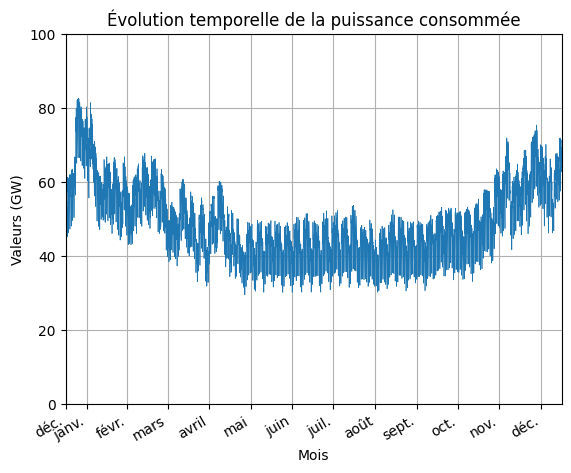

In [10]:
#Question 5

Mois = mdates.MonthLocator(bymonthday=1)  # chaque mois, le premier jour du mois.

df = df.reset_index()
df['Index'] = pd.to_datetime(df['Index'])# remet l'index en colonne
df = df.set_index('Index')

#format affichage Mois : 
MoisFmt = mdates.DateFormatter('%b')  # nom du mois abrégé sur 4 lettres.
Hours = mdates.HourLocator()   #

#%%Template de Tracé d’une figure
  #On crée le repère        
fig, ax = plt.subplots()
  #tracé de la courbe conso vs temps, avec des valeurs de divisées par 1000, pour une table de données indexée sur le temps.
ax.plot(df.index, (df['Load'].values/1000), linewidth=.5)

   #affichage du titre
plt.title('Évolution temporelle de la puissance consommée')
#Limites min et max de l’axe x
ax.set_xlim(df.index[0], df.index[-1])

#positionnement des étiquettes de temps à chaque mois
#ax.xaxis.set_major_locator(Mois)
#format des étiquettes de temps
#ax.xaxis.set_major_formatter(MoisFmt)

#positionnement des étiquettes de temps à chaque mois
unique_months = df.index.to_period("M").unique()
month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]
month_labels = [m.strftime("%b") for m in unique_months]

ax.set_xticks(month_positions)
ax.set_xticklabels(month_labels)
ax.set_xticklabels(month_labels, rotation=30, ha='right')

#légende de l'axe des abscisses
plt.xlabel('Mois')

#Limites min max de l’axe y
ax.set_ylim(0, 100)
#légende de l'axe des ordonnées
plt.ylabel('Valeurs (GW)')

# affichage de la grille pour faciliter la lecture des valeurs
plt.grid(True)
#sauvegarde de la figure en .svg :
plt.savefig('puissance.svg')
# affichage de la figure
plt.show()




**Question 6**

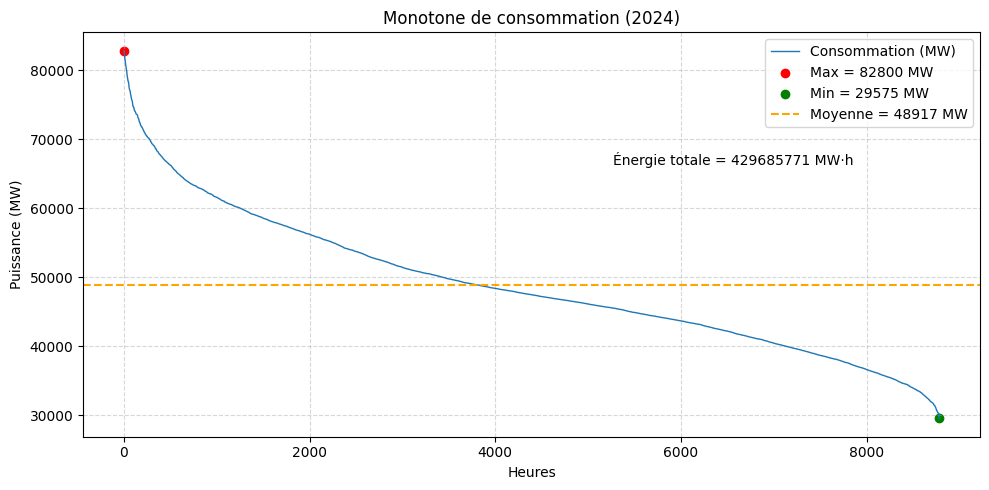

In [12]:
# question 6

import matplotlib.pyplot as plt
import numpy as np

sorted_load = np.sort(df['Load'].values)[::-1]  # tri décroissant

# calcul max, min, moyenne et énergie consommée
max_load = sorted_load[0]
min_load = sorted_load[-1]
mean_load = np.mean(sorted_load)
total_energy = np.sum(sorted_load)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(sorted_load, linewidth=1, label='Consommation (MW)')

#Afficher max, min, moyenne, energie totale
ax.scatter(0, max_load, color='red', label=f'Max = {max_load:.0f} MW')
ax.scatter(len(sorted_load)-1, min_load, color='green', label=f'Min = {min_load:.0f} MW')
ax.axhline(mean_load, color='orange', linestyle='--', label=f'Moyenne = {mean_load:.0f} MW')
ax.text(len(sorted_load)*0.6, max_load*0.8, f'Énergie totale = {total_energy:.0f} MW·h', fontsize=10)

#titres
ax.set_title("Monotone de consommation (2024)")
ax.set_xlabel("Heures")
ax.set_ylabel("Puissance (MW)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('monotone1.svg')
plt.show()


In [ ]:
#question 7
hours = 366 * 24  # 2024 est bissextile

annual_energy = df['Load'].sum()  # somme des puissances horaires en MW

# Puissance maximale consommée (MW)
max_load = df['Load'].max()

# Facteur de charge
fc = annual_energy / (max_load * hours)

print(f"Facteur de charge : {fc:.3f}")


Facteur de charge : 0.591


## Exercice 2 Analyse de la production

**Question 1**

In [20]:
colonnes = df.columns.tolist()

# Retirer les deux premières (Index et Load)
types_prod = colonnes[2:]

print(types_prod)

#on approxime la puissance installée par le maximum de puissance appelée en 2024 (on peut corriger ça avec d ela biblio)
puissances_estimees = df[types_prod].max()

print(puissances_estimees)

fc_dico = {}
for prod in types_prod:
    energie_annuelle = df[prod].sum()  # en MWh si données en MW
    puissance_installée = puissances_estimees[prod]  # en MW
    fc = energie_annuelle / (puissance_installée * 8784)
    fc_dico[prod] = fc

# Affichage des résultats
for prod, fc in fc_dico.items():
    print(f"{prod} : facteur de capacité = {fc:.2f}")



['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Hydro Pumped Storage Generation', 'Hydro Pumped Storage Consumption', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Nuclear', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']
Biomass                               392.0
Fossil Gas                           8953.0
Fossil Hard coal                     1087.0
Fossil Oil                           1375.0
Hydro Pumped Storage Generation      4876.0
Hydro Pumped Storage Consumption     3594.0
Hydro Run-of-river and poundage      8051.0
Hydro Water Reservoir                5212.0
Nuclear                             53046.0
Solar                               15066.0
Waste                                 355.0
Wind Offshore                        1442.0
Wind Onshore                        17919.0
dtype: float64
Biomass : facteur de capacité = 0.90
Fossil Gas : facteur de capacité = 0.22
Fossil Hard coal : facteur de capacité = 0.06
Fossil Oil : facteur de capacité = 0.

**Question 2**

In [19]:
energie_annuelle = df[types_prod].sum()

print(energie_annuelle)

energie_totale_produite = energie_annuelle.sum()
print(energie_totale_produite)

energie_totale_consommée = df['Load'].sum()

ecart = energie_totale_produite - energie_totale_consommée
pourcentage_ecart = ecart / energie_totale_consommée * 100

print(f"Energie totale produite : {energie_totale_produite:.0f} MWh")
print(f"Energie totale consommée : {energie_totale_consommée:.0f} MWh")
print(f"Écart : {ecart:.0f} MWh ({pourcentage_ecart:.2f} %)")

Biomass                               3100986.0
Fossil Gas                           17227893.0
Fossil Hard coal                       603004.0
Fossil Oil                            1393593.0
Hydro Pumped Storage Generation       6934261.0
Hydro Pumped Storage Consumption      6059105.0
Hydro Run-of-river and poundage      45894226.0
Hydro Water Reservoir                17444108.0
Nuclear                             360097767.0
Solar                                23322092.0
Waste                                 1847478.0
Wind Offshore                         3953359.0
Wind Onshore                         41914779.0
dtype: float64
529792651.0
Energie totale produite : 529792651 MWh
Energie totale consommée : 429685771 MWh
Écart : 100106880 MWh (23.30 %)


**Question 3**

In [ ]:
centrales_concernees = ['Nuclear', 'Fossil Hard coal', 'Fossil Gas', 'Fossil Oil'] #On récupère seulement les centrales concernées

energie_annuelle_filtrees = df[centrales_concernees].sum()

co2_tonnes_per_MWh = {
    'Nuclear': 0,
    'Fossil Hard coal': 1,
    'Fossil Gas': 0.4,
    'Fossil Oil': 0.6
}

total_co2 = energie_annuelle_filtrees * pd.Series(co2_tonnes_per_MWh)
print(energie_annuelle_filtrees)
print(total_co2)

Nuclear             360097767.0
Fossil Hard coal       603004.0
Fossil Gas           17227893.0
Fossil Oil            1393593.0
dtype: float64
Nuclear                   0.0
Fossil Hard coal     603004.0
Fossil Gas          6891157.2
Fossil Oil           836155.8
dtype: float64


**Question 4**

In [ ]:
cout_combustible_par_MWh = {
    'Nuclear': 5,
    'Fossil Hard coal': 10,
    'Fossil Gas': 30,
    'Fossil Oil': 50
}

total_cout_combustible = energie_annuelle_filtrees * pd.Series(cout_combustible_par_MWh)
print(total_cout_combustible)

Nuclear             1.800489e+09
Fossil Hard coal    6.030040e+06
Fossil Gas          5.168368e+08
Fossil Oil          6.967965e+07
dtype: float64


# Exercice 3 Dimensionnement du parc de production
**Question 1**

313533580.0


/tmp/ipykernel_5791/2643899984.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unique_months = df.index.to_period("M").unique()
/tmp/ipykernel_5791/2643899984.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]


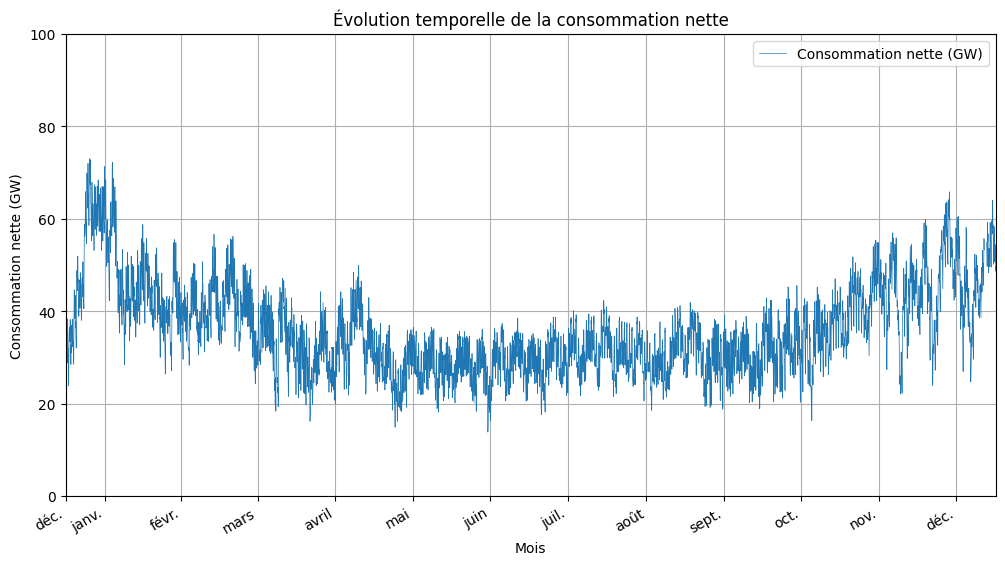

In [35]:
production_fatale = df['Wind Onshore'] + df['Wind Offshore'] + df['Solar'] + df['Hydro Run-of-river and poundage']

# Consommation nette
df['conso_nette'] = df['Load'] - production_fatale
print(df['conso_nette'].sum())

df = df.reset_index()
df['Index'] = pd.to_datetime(df['Index'])  # remet l'index en colonne
df = df.set_index('Index')

MoisFmt = mdates.DateFormatter('%b')  # mois abrégé
# On récupère la position de chaque mois pour placer les labels
unique_months = df.index.to_period("M").unique()
month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]
month_labels = [m.strftime("%b") for m in unique_months]


fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['conso_nette']/1000, linewidth=0.5, label='Consommation nette (GW)')

# Titre
plt.title('Évolution temporelle de la consommation nette')

# Axe x : limites et labels
ax.set_xlim(df.index[0], df.index[-1])
ax.set_xticks(month_positions)
ax.set_xticklabels(month_labels, rotation=30, ha='right')
plt.xlabel('Mois')

# Axe y : limites et label
ax.set_ylim(0, 100)  # adapter si nécessaire selon tes données
plt.ylabel('Consommation nette (GW)')

# Grille et légende
plt.grid(True)
ax.legend()

# Sauvegarde et affichage
plt.savefig('conso_nette.svg')
plt.show()

**Question 2**

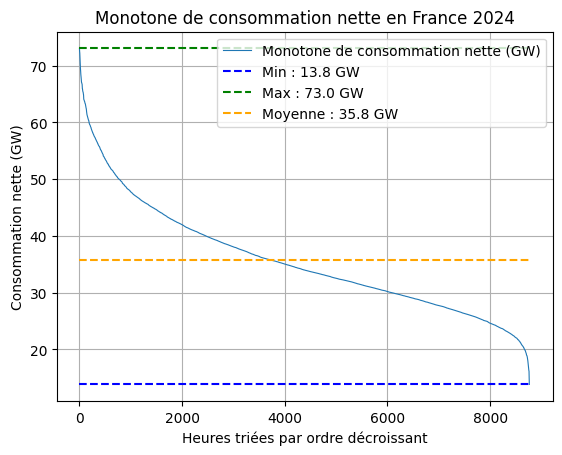

In [ ]:
conso_nette_monotone = df['conso_nette'].sort_values(ascending=False)

# Figure
fig, ax = plt.subplots()

# Courbe monotone
ax.plot(np.arange(len(conso_nette_monotone)), conso_nette_monotone/1000, linewidth=0.8, label='Monotone de consommation nette (GW)')

# Ajout des valeurs min, max et moyenne
val_min = conso_nette_monotone.min()/1000
val_max = conso_nette_monotone.max()/1000
val_moy = conso_nette_monotone.mean()/1000

ax.hlines(val_min, 0, len(conso_nette_monotone)-1, colors='blue', linestyles='--', label=f'Min : {val_min:.1f} GW')
ax.hlines(val_max, 0, len(conso_nette_monotone)-1, colors='green', linestyles='--', label=f'Max : {val_max:.1f} GW')
ax.hlines(val_moy, 0, len(conso_nette_monotone)-1, colors='orange', linestyles='--', label=f'Moyenne : {val_moy:.1f} GW')

# Labels et titre
ax.set_xlabel('Heures triées par ordre décroissant')
ax.set_ylabel('Consommation nette (GW)')
ax.set_title('Monotone de consommation nette en France 2024')
ax.grid(True)
ax.legend()

# Sauvegarde
plt.savefig('conso_nette_monotone.svg')
plt.show()

**Question 3**

In [39]:
# Données

# Colonnes des centrales concernées
centrales = ['Nuclear', 'Fossil Hard coal', 'Fossil Gas', 'Fossil Oil']

# Puissance installée approximative = valeur maximale observée (MW)
puissance_installee = {c: df[c].max() for c in centrales}

print(puissance_installee)

capex = {
    'Nuclear': 6,       # M€/MWé
    'Fossil Hard coal': 1.5,
    'Fossil Gas': 1,
    'Fossil Oil': 0.7
}

taux_annuite = 0.08

# Calcul du coût annuel en M€
cout_annuel_investissement = {c: capex[c] * puissance_installee[c] * taux_annuite 
                              for c in capex}

# Affichage
for centrale, cout in cout_annuel_investissement.items():
    print(f"{centrale} : coût annuel investissement = {cout:.2f} M€")


{'Nuclear': np.int64(53046), 'Fossil Hard coal': np.float64(1087.0), 'Fossil Gas': np.int64(8953), 'Fossil Oil': np.int64(1375)}
Nuclear : coût annuel investissement = 25462.08 M€
Fossil Hard coal : coût annuel investissement = 130.44 M€
Fossil Gas : coût annuel investissement = 716.24 M€
Fossil Oil : coût annuel investissement = 77.00 M€


**Question 4**